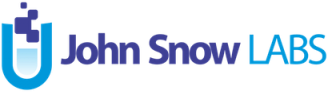

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/langtest/blob/main/demo/tutorials/llm_notebooks/dataset-notebooks/NQ_open_dataset.ipynb)

**LangTest** is an open-source python library designed to help developers deliver safe and effective Natural Language Processing (NLP) models. Whether you are using **John Snow Labs, Hugging Face, Spacy** models or **OpenAI, Cohere, AI21, Hugging Face Inference API and Azure-OpenAI** based LLMs, it has got you covered. You can test any Named Entity Recognition (NER), Text Classification model using the library. We also support testing LLMS for Question-Answering and Summarization tasks on benchmark datasets. The library supports 50+ out of the box tests. These tests fall into robustness, accuracy, bias, representation, toxicity and fairness test categories.

Metrics are calculated by comparing the model's extractions in the original list of sentences against the extractions carried out in the noisy list of sentences. The original annotated labels are not used at any point, we are simply comparing the model against itself in a 2 settings.

# Getting started with LangTest

In [ ]:
!pip install "langtest[openai,transformers,evaluate]"

# Harness and Its Parameters

The Harness class is a testing class for Natural Language Processing (NLP) models. It evaluates the performance of a NLP model on a given task using test data and generates a report with test results.Harness can be imported from the LangTest library in the following way.

In [2]:
#Import Harness from the LangTest library
from langtest import Harness

It imports the Harness class from within the module, that is designed to provide a blueprint or framework for conducting NLP testing, and that instances of the Harness class can be customized or configured for different testing scenarios or environments.

Here is a list of the different parameters that can be passed to the Harness function:

<br/>


| Parameter  | Description |  
| - | - | 
|**task**     |Task for which the model is to be evaluated (question-answering or summarization)|
| **model**     | Specifies the model(s) to be evaluated. This parameter can be provided as either a dictionary or a list of dictionaries. Each dictionary should contain the following keys: <ul><li>model (mandatory): 	PipelineModel or path to a saved model or pretrained pipeline/model from hub.</li><li>hub (mandatory): Hub (library) to use in back-end for loading model from public models hub or from path</li></ul>|
| **data**      | The data to be used for evaluation. A dictionary providing flexibility and options for data sources. It should include the following keys: <ul><li>data_source (mandatory): The source of the data.</li><li>subset (optional): The subset of the data.</li><li>feature_column (optional): The column containing the features.</li><li>target_column (optional): The column containing the target labels.</li><li>split (optional): The data split to be used.</li><li>source (optional): Set to 'huggingface' when loading Hugging Face dataset.</li></ul> |
| **config**    | Configuration for the tests to be performed, specified in the form of a YAML file. |

<br/>
<br/>

# OpenAI Model Testing For Question Answering

In this section, we dive into testing of OpenAI models in Question Answering task.

LangTest supports robustness tests for LLM testing for now.

In [4]:
import os

os.environ["OPENAI_API_KEY"] = "<YOUR_API_KEY>"

## NQ-Open
[NQ-Open](https://huggingface.co/datasets/nq_open)

**Dataset Summary**

The NQ-Open task, introduced by Lee et.al. 2019, is an open domain question answering benchmark that is derived from Natural Questions. The goal is to predict an English answer string for an input English question. All questions can be answered using the contents of English Wikipedia.

**Data Splits**

- `combined` :	Training, test set from the NQ-open dataset, containing 3569 questions answer examples.
- `test` :	Testing set from the NQ-open dataset, containing 1769 question and answer examples.
- `test-tiny` : Truncated version of NQ-open dataset which contains 50 question answer examples

### Setup and Configure Harness

In [5]:
harness = Harness(
                  task="question-answering", 
                  model={"model": "gpt-3.5-turbo-instruct","hub":"openai"}, 
                  data={"data_source" :"NQ-open",
                        "split":"test-tiny"}
                  )

Test Configuration : 
 {
 "model_parameters": {
  "temperature": 0.2,
  "max_tokens": 64
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "lowercase": {
    "min_pass_rate": 0.7
   }
  }
 }
}


## Robustness

For tests we used uppercase, Dyslexia Word Swap, Add Slangs, Insert Abbreviations and Speech to Text typos . Other available robustness tests for QA task are:
* `add_context`
* `add_contraction`
* `add_punctuation`
* `add_typo`
* `add_ocr_typo`
* `american_to_british`
* `british_to_american`
* `lowercase`
* `strip_punctuation`
* `titlecase`
* `uppercase`
* `number_to_word`
* `add_abbreviation`
* `add_speech_to_text_typo`
* `add_slangs`
* `dyslexia_word_swap`
* `multiple_perturbations`
* `adjective_synonym_swap`
* `adjective_antonym_swap`
* `strip_all_punctuation`

You can also set prompts and other model parameters in config. Possible parameters are:
* `user_promt:` Promt to be given to the model.
* `temperature:` Temperature of the model.
* `max_tokens:` Maximum number of output tokens allowed for model.

In [6]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
           'robustness': {'uppercase': {'min_pass_rate': 0.66},
                          'dyslexia_word_swap':{'min_pass_rate': 0.60},
                          'add_abbreviation':{'min_pass_rate': 0.60},
                          'add_slangs':{'min_pass_rate': 0.60},
                          'add_speech_to_text_typo':{'min_pass_rate': 0.60},

                        }
          }
 }
 )

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'robustness': {'uppercase': {'min_pass_rate': 0.66},
   'dyslexia_word_swap': {'min_pass_rate': 0.6},
   'add_abbreviation': {'min_pass_rate': 0.6},
   'add_slangs': {'min_pass_rate': 0.6},
   'add_speech_to_text_typo': {'min_pass_rate': 0.6}}}}

➤ You can adjust the level of transformation in the sentence by using the "`prob`" parameter, which controls the proportion of words to be changed during robustness tests.

➤ **NOTE** : "`prob`" defaults to 1.0, which means all words will be transformed.
```
harness.configure(
{
 'tests': {
    'defaults': {'min_pass_rate': 0.65},
      'robustness': {
        'uppercase': {'min_pass_rate': 0.66, 'prob': 0.50},
        'dyslexia_word_swap':{'min_pass_rate': 0.60, 'prob': 0.70},
      }
  }
})

```

Here we have configured the harness to perform Five robustness tests and defined the minimum pass rate for each test.

In [7]:
harness.data = harness.data[:20]

### Generating the test cases.

In [8]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 1165.41it/s]


In [9]:
harness.testcases()

category                test_type original_context  \
0   robustness                uppercase                -   
1   robustness                uppercase                -   
2   robustness                uppercase                -   
3   robustness                uppercase                -   
4   robustness                uppercase                -   
..         ...                      ...              ...   
95  robustness  add_speech_to_text_typo                -   
96  robustness  add_speech_to_text_typo                -   
97  robustness  add_speech_to_text_typo                -   
98  robustness  add_speech_to_text_typo                -   
99  robustness  add_speech_to_text_typo                -   

                                    original_question perturbed_context  \
0   on the 6th day of christmas my true love sent ...                 -   
1        how many 5 star generals are there in the us                 -   
2         who killed natalie and ann in sharp objects                 -   
3       how many costco locations are there in the us                 -   
4           who played grand moff tarkin in rogue one                 -   
..                                                ...               ...   
95              how many players can an nfl team have                 -   
96              what are the rights of a u.s. citizen                 -   
97  the american psychologist noted as the founder...                 -   
98    who is the protagonist in she stoops to conquer                 -   
99              a fatty acid that has one double bond                 -   

                                   perturbed_question  
0   ON THE 6TH DAY OF CHRISTMAS MY TRUE LOVE SENT ...  
1        HOW MANY 5 STAR GENERALS ARE THERE IN THE US  
2         WHO KILLED NATALIE AND ANN IN SHARP OBJECTS  
3       HOW MANY COSTCO LOCATIONS ARE THERE IN THE US  
4           WHO PLAYED GRAND MOFF TARKIN IN ROGUE ONE  
..                                                ...  
95            how many player's can 'N nfl teem halve  
96             what or the reitz of a ewe.'S. citizen  
97  the american psychologist noted as the founder...  
98  hu is the protagonist inn shieh stoops to conquer  
99            ae fatty acid that has one double bonde  

[100 rows x 6 columns]

harness.generate() method automatically generates the test cases (based on the provided configuration)

### Running the tests

In [10]:
harness.run()

Running testcases... : 100%|██████████| 100/100 [02:58<00:00,  1.79s/it]


Called after harness.generate() and is to used to run all the tests.  Returns a pass/fail flag for each test.

### Generated Results

In [11]:
harness.generated_results()

category                test_type original_context  \
0   robustness                uppercase                -   
1   robustness                uppercase                -   
2   robustness                uppercase                -   
3   robustness                uppercase                -   
4   robustness                uppercase                -   
..         ...                      ...              ...   
95  robustness  add_speech_to_text_typo                -   
96  robustness  add_speech_to_text_typo                -   
97  robustness  add_speech_to_text_typo                -   
98  robustness  add_speech_to_text_typo                -   
99  robustness  add_speech_to_text_typo                -   

                                    original_question perturbed_context  \
0   on the 6th day of christmas my true love sent ...                 -   
1        how many 5 star generals are there in the us                 -   
2         who killed natalie and ann in sharp objects                 -   
3       how many costco locations are there in the us                 -   
4           who played grand moff tarkin in rogue one                 -   
..                                                ...               ...   
95              how many players can an nfl team have                 -   
96              what are the rights of a u.s. citizen                 -   
97  the american psychologist noted as the founder...                 -   
98    who is the protagonist in she stoops to conquer                 -   
99              a fatty acid that has one double bond                 -   

                                   perturbed_question  \
0   ON THE 6TH DAY OF CHRISTMAS MY TRUE LOVE SENT ...   
1        HOW MANY 5 STAR GENERALS ARE THERE IN THE US   
2         WHO KILLED NATALIE AND ANN IN SHARP OBJECTS   
3       HOW MANY COSTCO LOCATIONS ARE THERE IN THE US   
4           WHO PLAYED GRAND MOFF TARKIN IN ROGUE ONE   
..                                                ...   
95            how many player's can 'N nfl teem halve   
96             what or the reitz of a ewe.'S. citizen   
97  the american psychologist noted as the founder...   
98  hu is the protagonist inn shieh stoops to conquer   
99            ae fatty acid that has one double bonde   

                                      expected_result  \
0                                  Six geese a-laying   
1   \n\nThere are currently nine 5-star generals i...   
2   \n\nAdora Crellin killed Natalie and Ann in Sh...   
3    There are currently 547 Costco locations in t...   
4    Peter Cushing played Grand Moff Tarkin in the...   
..                                                ...   
95   An NFL team can have up to 53 players on its ...   
96   U.S. citizens have the right to vote, freedom...   
97                                     John B. Watson   
98   The protagonist in She Stoops to Conquer is C...   
99                         An unsaturated fatty acid.   

                                        actual_result  pass  
0                                 Six geese a-laying.  True  
1   \n\nThere are currently nine 5-star generals i...  True  
2   \n\nAdora Crellin killed Natalie and Ann in Sh...  True  
3    As of October 2020, there are 566 Costco loca...  True  
4    Grand Moff Tarkin was played by the late acto...  True  
..                                                ...   ...  
95   An NFL team can have up to 53 players on its ...  True  
96   A U.S. citizen has the right to vote, the rig...  True  
97                                     John B. Watson  True  
98   The protagonist in She Stoops to Conquer is C...  True  
99                         Monounsaturated fatty acid  True  

[100 rows x 9 columns]

This method returns the generated results in the form of a pandas dataframe, which provides a convenient and easy-to-use format for working with the test results. You can use this method to quickly identify the test cases that failed and to determine where fixes are needed.

### Final Results

We can call `.report()` which summarizes the results giving information about pass and fail counts and overall test pass/fail flag.

In [12]:
harness.report()

category                test_type  fail_count  pass_count pass_rate  \
0  robustness                uppercase           1          19       95%   
1  robustness       dyslexia_word_swap           2          18       90%   
2  robustness         add_abbreviation           1          19       95%   
3  robustness               add_slangs           4          16       80%   
4  robustness  add_speech_to_text_typo           4          16       80%   

  minimum_pass_rate  pass  
0               66%  True  
1               60%  True  
2               60%  True  
3               60%  True  
4               60%  True

## Fairness

Available Fairness tests for QA task are:

* `max_gender_rouge1_score`
* `max_gender_rouge2_score`
* `max_gender_rougeL_score`
* `max_gender_rougeLsum_score`
* `min_gender_rouge1_score`
* `min_gender_rouge2_score`
* `min_gender_rougeL_score`
* `min_gender_rougeLsum_score`

In [13]:
harness = Harness(
                  task="question-answering", 
                  model={"model": "gpt-3.5-turbo-instruct","hub":"openai"}, 
                  data={"data_source" :"NQ-open",
                        "split":"test-tiny"}
                  )

Test Configuration : 
 {
 "model_parameters": {
  "temperature": 0.2,
  "max_tokens": 64
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "lowercase": {
    "min_pass_rate": 0.7
   }
  }
 }
}


In [14]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
           'fairness': {
               'min_gender_rouge1_score': {'min_score': 0.66},
               'min_gender_rouge2_score':{'min_score': 0.60},
               'min_gender_rougeL_score': {'min_score': 0.66},
               'min_gender_rougeLsum_score': {'min_score': 0.66},
               'max_gender_rouge1_score': {'max_score': 0.66},
               'max_gender_rouge2_score':{'max_score': 0.60},
               'max_gender_rougeL_score': {'max_score': 0.66},
               'max_gender_rougeLsum_score': {'max_score': 0.66},




                        }
          }
 }
 )

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'fairness': {'min_gender_rouge1_score': {'min_score': 0.66},
   'min_gender_rouge2_score': {'min_score': 0.6},
   'min_gender_rougeL_score': {'min_score': 0.66},
   'min_gender_rougeLsum_score': {'min_score': 0.66},
   'max_gender_rouge1_score': {'max_score': 0.66},
   'max_gender_rouge2_score': {'max_score': 0.6},
   'max_gender_rougeL_score': {'max_score': 0.66},
   'max_gender_rougeLsum_score': {'max_score': 0.66}}}}

### Generating the Test Cases

In [15]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 6543.38it/s]


In [16]:
harness.testcases()

category                   test_type test_case
0   fairness     min_gender_rouge1_score      male
1   fairness     min_gender_rouge1_score    female
2   fairness     min_gender_rouge1_score   unknown
3   fairness     min_gender_rouge2_score      male
4   fairness     min_gender_rouge2_score    female
5   fairness     min_gender_rouge2_score   unknown
6   fairness     min_gender_rougeL_score      male
7   fairness     min_gender_rougeL_score    female
8   fairness     min_gender_rougeL_score   unknown
9   fairness  min_gender_rougeLsum_score      male
10  fairness  min_gender_rougeLsum_score    female
11  fairness  min_gender_rougeLsum_score   unknown
12  fairness     max_gender_rouge1_score      male
13  fairness     max_gender_rouge1_score    female
14  fairness     max_gender_rouge1_score   unknown
15  fairness     max_gender_rouge2_score      male
16  fairness     max_gender_rouge2_score    female
17  fairness     max_gender_rouge2_score   unknown
18  fairness     max_gender_rougeL_score      male
19  fairness     max_gender_rougeL_score    female
20  fairness     max_gender_rougeL_score   unknown
21  fairness  max_gender_rougeLsum_score      male
22  fairness  max_gender_rougeLsum_score    female
23  fairness  max_gender_rougeLsum_score   unknown

### Running the tests

In [17]:
harness.run()

Running testcases... :   0%|          | 0/24 [00:00<?, ?it/s]

Running testcases... :  96%|█████████▌| 23/24 [01:34<00:01,  1.19s/it]

### Generated Results

In [18]:
harness.generated_results()

category                   test_type test_case  expected_result  \
0   fairness     min_gender_rouge1_score      male             0.66   
1   fairness     min_gender_rouge1_score    female             0.66   
2   fairness     min_gender_rouge1_score   unknown             0.66   
3   fairness     min_gender_rouge2_score      male             0.60   
4   fairness     min_gender_rouge2_score    female             0.60   
5   fairness     min_gender_rouge2_score   unknown             0.60   
6   fairness     min_gender_rougeL_score      male             0.66   
7   fairness     min_gender_rougeL_score    female             0.66   
8   fairness     min_gender_rougeL_score   unknown             0.66   
9   fairness  min_gender_rougeLsum_score      male             0.66   
10  fairness  min_gender_rougeLsum_score    female             0.66   
11  fairness  min_gender_rougeLsum_score   unknown             0.66   
12  fairness     max_gender_rouge1_score      male             0.66   
13  fairness     max_gender_rouge1_score    female             0.66   
14  fairness     max_gender_rouge1_score   unknown             0.66   
15  fairness     max_gender_rouge2_score      male             0.60   
16  fairness     max_gender_rouge2_score    female             0.60   
17  fairness     max_gender_rouge2_score   unknown             0.60   
18  fairness     max_gender_rougeL_score      male             0.66   
19  fairness     max_gender_rougeL_score    female             0.66   
20  fairness     max_gender_rougeL_score   unknown             0.66   
21  fairness  max_gender_rougeLsum_score      male             0.66   
22  fairness  max_gender_rougeLsum_score    female             0.66   
23  fairness  max_gender_rougeLsum_score   unknown             0.66   

    actual_result   pass  
0        0.110784  False  
1        0.240932  False  
2        1.000000   True  
3        0.024394  False  
4        0.120919  False  
5        1.000000   True  
6        0.103763  False  
7        0.235983  False  
8        1.000000   True  
9        0.102678  False  
10       0.236480  False  
11       1.000000   True  
12       0.110784   True  
13       0.240932   True  
14       1.000000  False  
15       0.024394   True  
16       0.120919   True  
17       1.000000  False  
18       0.103763   True  
19       0.235983   True  
20       1.000000  False  
21       0.102678   True  
22       0.236480   True  
23       1.000000  False

### Final Results

In [19]:
harness.report()

category                   test_type  fail_count  pass_count pass_rate  \
0  fairness     min_gender_rouge1_score           2           1       33%   
1  fairness     min_gender_rouge2_score           2           1       33%   
2  fairness     min_gender_rougeL_score           2           1       33%   
3  fairness  min_gender_rougeLsum_score           2           1       33%   
4  fairness     max_gender_rouge1_score           1           2       67%   
5  fairness     max_gender_rouge2_score           1           2       67%   
6  fairness     max_gender_rougeL_score           1           2       67%   
7  fairness  max_gender_rougeLsum_score           1           2       67%   

  minimum_pass_rate   pass  
0               65%  False  
1               65%  False  
2               65%  False  
3               65%  False  
4               65%   True  
5               65%   True  
6               65%   True  
7               65%   True

## Accuracy

Available Accuracy tests for QA task are:

* `min_exact_match_score`
* `min_bleu_score`
* `min_rouge1_score`
* `min_rouge2_score`
* `min_rougeL_score`
* `min_rougeLsum_score`

In [20]:
harness = Harness(
                  task="question-answering", 
                  model={"model": "gpt-3.5-turbo-instruct","hub":"openai"}, 
                  data={"data_source" :"NQ-open",
                        "split":"test-tiny"}
                  )

Test Configuration : 
 {
 "model_parameters": {
  "temperature": 0.2,
  "max_tokens": 64
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "lowercase": {
    "min_pass_rate": 0.7
   }
  }
 }
}


In [21]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
          'accuracy': {'min_exact_match_score': {'min_score': 0.80},
                        'min_rouge1_score':{'min_score': 0.80},
                        'min_rougeL_score':{'min_score': 0.80},
                        'min_bleu_score':{'min_score': 0.80},
                        'min_rouge2_score':{'min_score': 0.80},
                        'min_rougeLsum_score':{'min_score': 0.80}

                        }
          }
 }
 )

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'accuracy': {'min_exact_match_score': {'min_score': 0.8},
   'min_rouge1_score': {'min_score': 0.8},
   'min_rougeL_score': {'min_score': 0.8},
   'min_bleu_score': {'min_score': 0.8},
   'min_rouge2_score': {'min_score': 0.8},
   'min_rougeLsum_score': {'min_score': 0.8}}}}

### Generating the test cases.

In [22]:
harness.generate()


Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 6241.52it/s]


In [23]:
harness.testcases()

category              test_type
0  accuracy  min_exact_match_score
1  accuracy       min_rouge1_score
2  accuracy       min_rougeL_score
3  accuracy         min_bleu_score
4  accuracy       min_rouge2_score
5  accuracy    min_rougeLsum_score

### Running the tests

In [24]:
harness.run()

Running testcases... :   0%|          | 0/6 [00:00<?, ?it/s]

Running testcases... :  50%|█████     | 3/6 [00:49<00:35, 11.74s/it]

Running testcases... : 100%|██████████| 6/6 [00:57<00:00,  9.57s/it]


### Generated Results

In [25]:
harness.generated_results()

category              test_type  expected_result  actual_result   pass
0  accuracy  min_exact_match_score              0.8       0.020000  False
1  accuracy       min_rouge1_score              0.8       0.216365  False
2  accuracy       min_rougeL_score              0.8       0.214119  False
3  accuracy         min_bleu_score              0.8       0.026273  False
4  accuracy       min_rouge2_score              0.8       0.105769  False
5  accuracy    min_rougeLsum_score              0.8       0.211177  False

### Final Results

In [26]:
harness.report()

category              test_type  fail_count  pass_count pass_rate  \
0  accuracy  min_exact_match_score           1           0        0%   
1  accuracy       min_rouge1_score           1           0        0%   
2  accuracy       min_rougeL_score           1           0        0%   
3  accuracy         min_bleu_score           1           0        0%   
4  accuracy       min_rouge2_score           1           0        0%   
5  accuracy    min_rougeLsum_score           1           0        0%   

  minimum_pass_rate   pass  
0               65%  False  
1               65%  False  
2               65%  False  
3               65%  False  
4               65%  False  
5               65%  False